# Statystyka matematyczna - ćwiczenia laboratoryjne

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

# Zestaw zadań 9: Weryfikacja hipotez statystycznych - testy parametryczne

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Funkcje do wykorzystania

In [3]:
def vizualize_test_result(pdf, statistic, rejection_region):
    """
    Parameters
    -------
    pdf: pandas.DataFrame
        Tablica zawierająca informacje niezbędne do wykreślenia funkcji gęstości prawdopodobieństwa wykorzystywanego w teście rozkładu
        teoretycznego - index z wariantami zmiennej losowej i nadaną nazwą zmiennej (np. x) oraz pojedynczą kolumnę z wartościami
        gęstościami prawdopodobieństwa wyliczonymi dla poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. f(x)).
    statistic: float
        Wartość statystyki testowej wyliczonej na podstawie próby losowej.
    rejection_region: list
        Lista zawierająca trzy elementy pozwalające na określenie obszaru krytycznego w następującej kolejności:
         - wartość dolnej granicy przedziału,
         - wartość górnej granicy przedziału,
         - "inner" lub "outer" w zależności od tego, czy ma być zakolorowana wewnętrzna, czy zewnętrzna część przedziału.
    """
    pdf_name= pdf.columns[0]
    
    fig, axes = plt.subplots(1, 1, figsize=(8, 3), facecolor='white')

    axes.plot(pdf.index, pdf[pdf_name], color="grey")

    if rejection_region[2]=="inner":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index > rejection_region[0]) & (pdf.index<rejection_region[1])), color='red', alpha=0.5)
    elif rejection_region[2]=="outer":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index < rejection_region[0]) | (pdf.index>rejection_region[1])), color='red', alpha=0.5)
    
    axes.vlines(x=statistic, ymin=0, ymax=np.max(pdf[pdf_name]/3), color="blue")
    
    axes.set_xlabel(pdf.index.name)
    axes.set_ylabel(pdf_name)

### Dane do zadań

W celu wygenerowania danych wykorzystywanych w zawartych w notatniku komórkach testowych wykonaj poniższe komórki.

In [4]:
test_data_1 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=15, random_state=7), columns=["X"])
test_data_1.head()

,X
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


In [6]:
test_data_2 = pd.DataFrame(data=sp.stats.norm.rvs(loc=-0.15, scale=0.2, size=100, random_state=12)>0, columns=["X"])
test_data_2.head()

,X
0,False
1,False
2,False
3,False
4,True


In [7]:
test_data_3 = pd.DataFrame(columns=["A1", "A2", "A3"])
test_data_3["A1"] = [1802, 1992, 1854, 1880, 1761, 1900]
test_data_3["A2"] = [1664, 1755, 1823, 1862, np.nan, np.nan]
test_data_3["A3"] = [1877, 1710, 1882, 1720, 1950, np.nan]
test_data_3

,A1,A2,A3
0,1802,1664.0,1877.0
1,1992,1755.0,1710.0
2,1854,1823.0,1882.0
3,1880,1862.0,1720.0
4,1761,NaN,1950.0
5,1900,NaN,NaN


In [8]:
test_data_4 = pd.DataFrame(columns=["B1", "B2", "B3"])
test_data_4["B1"] = [9, 8, 7, 5]
test_data_4["B2"] = [9, 7, 6, 5]
test_data_4["B3"] = [4, 3, 1, 1]
test_data_4

,B1,B2,B3
0,9,9,4
1,8,7,3
2,7,6,1
3,5,5,1


In [9]:
test_data_5 = pd.DataFrame(columns=["C1", "C2", "C3", "C4", "C5", "C6"])
test_data_5["C1"] = np.hstack([sp.stats.norm.rvs(0.03, 1.5, 38, random_state=17), np.full(12, np.nan)])
test_data_5["C2"] = np.hstack([sp.stats.norm.rvs(0.42, 1.5, 45, random_state=43), np.full(5, np.nan)])
test_data_5["C3"] = np.hstack([sp.stats.norm.rvs(-0.12, 1.5, 42, random_state=14), np.full(8, np.nan)])
test_data_5["C4"] = sp.stats.norm.rvs(0.06, 1.5, 50, random_state=18)
test_data_5["C5"] = np.hstack([sp.stats.norm.rvs(-0.39, 1.5, 43, random_state=123), np.full(7, np.nan)])
test_data_5["C6"] = np.hstack([sp.stats.norm.rvs(0.12, 1.5, 39, random_state=13), np.full(11, np.nan)])
test_data_5.head()

,C1,C2,C3,C4,C5,C6
0,0.444399,0.806100,2.207009,0.179143,-2.018446,-0.948586
1,-2.751942,-0.942722,-0.001221,3.345304,1.106018,1.250650
2,0.965852,-0.147755,0.140965,-0.142338,0.034468,0.053245
3,1.747967,-0.382373,-0.228505,0.300777,-2.649442,0.797719
4,1.585786,1.707110,-3.126494,0.724047,-1.257900,2.137653


### Zadanie 1: Weryfikacja hipotezy o wartości przeciętnej [7 pkt]

Przygotuj funkcję `mean_NHST()`, która będzie weryfikować hipotezę o wartości przeciętnej i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w dołączonym do notatnika zestawie wzorów, w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

In [41]:
def mean_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "X" wynikami próby losowej.
    H0: float
        Wartość przeciętna przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość przeciętna jest różna od wartości przyjętej w H0,
        - less: wartość przeciętna jest mniejsza od wartości przyjętej w H0,
        - greater: wartość przeciętna jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    t: float
        Wyliczona na podstawie próby losowej wartość statystyki t.
    t_alpha: float
        Wartość statystyki t_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # data - proba
    # mam juz ustalone H0
    
    mean = data["X"].values.mean()
    std =  data["X"].values.std()
    df = len(data)-1 # stopnie swobody, zeby ladniej wygladalo
    t = (mean-H0) * np.sqrt(len(data)-1) / std 


    x_min = sp.stats.t.ppf(0.0001, df) # wartosc, dla ktorej dystrybuanta wynosi 0.001
    x_max = sp.stats.t.ppf(0.9999, df)
    dist_variants = np.linspace(x_min,x_max,1000) # distribution - rozklad
    dist_probabilities=sp.stats.t.pdf(x=dist_variants, df=df)
    dist = pd.DataFrame(data=dist_probabilities, index=dist_variants, columns=["f(x)"])
    dist.index.name="x"
        
    
    if(H1 == "two-sided"):
        t_alpha = sp.stats.t.ppf(1 - alpha/2, df)
        if( np.fabs(t) >= t_alpha): H=1
        else: H=0   
            
        vizualize_test_result(dist,t,(-t_alpha,t_alpha,"outer"))
        
    elif(H1 == "less"):
        t_alpha = sp.stats.t.ppf(alpha, df)
        if( t <= t_alpha): H=1
        else: H=0

        vizualize_test_result(dist,t,(x_min,t_alpha,"inner")) 

    elif(H1 == "greater"):
        t_alpha = sp.stats.t.ppf(1-alpha, df)
        if( t >= t_alpha): H=1
        else: H=0
    
        vizualize_test_result(dist,t,(t_alpha,x_max,"inner")) 

        
    return (t, t_alpha, H)

# mean_NHST(test_data_1, 5.08, "two-sided", 0.05), (-1.9346677837081263, 2.1447866879169273, 0)
# mean_NHST(test_data_1, 5.08, "less", 0.05), (-1.9346677837081263, -1.7613101357748564, 1)
# mean_NHST(test_data_1, 5.08, "greater", 0.05), (-1.9346677837081263, 1.7613101357748562, 0)

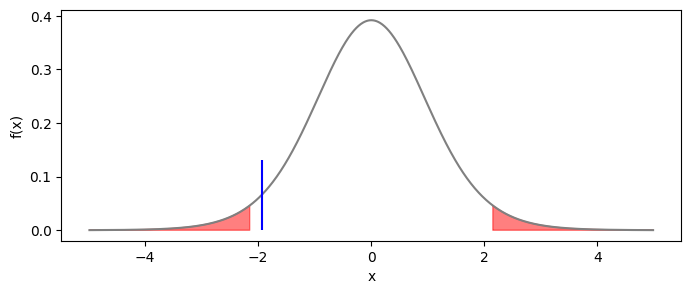

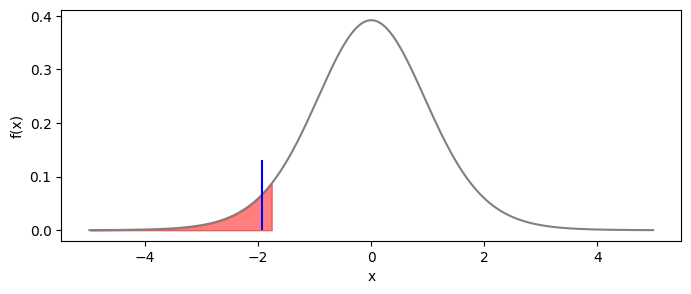

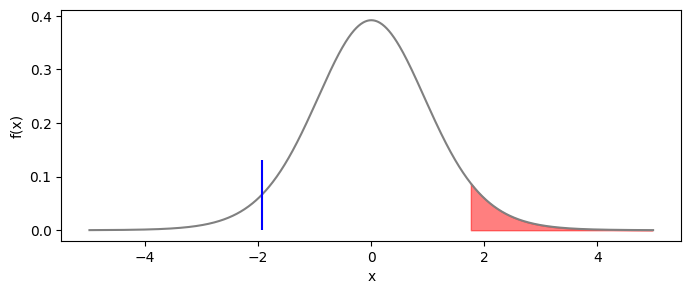

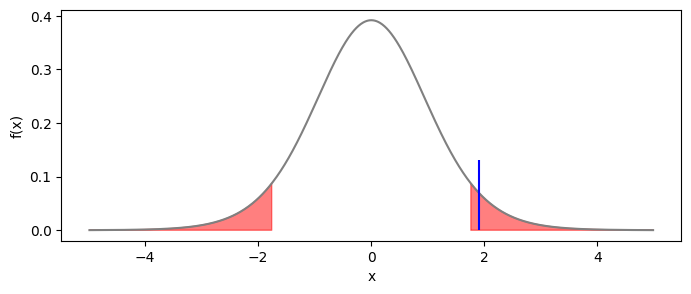

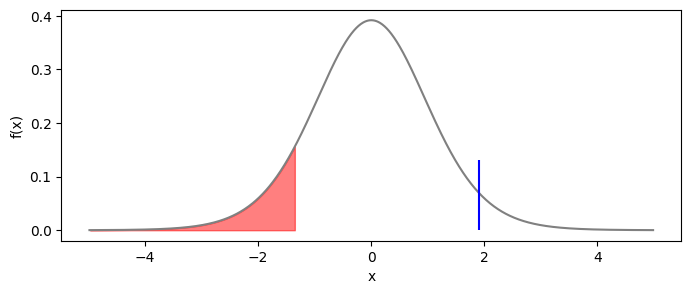

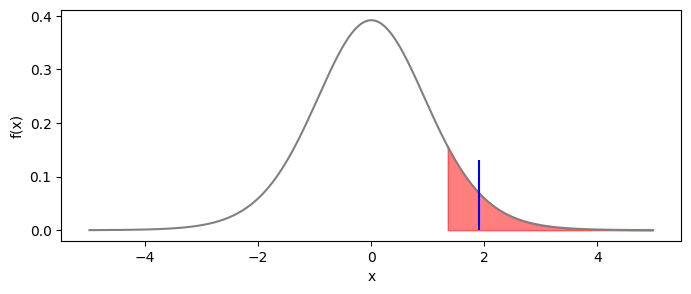

In [42]:
### Komórka testowa
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "two-sided", 0.05), (-1.9346677837081263, 2.1447866879169273, 0)))
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "less", 0.05), (-1.9346677837081263, -1.7613101357748564, 1)))
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "greater", 0.05), (-1.9346677837081263, 1.7613101357748562, 0)))

assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "two-sided", 0.1), (1.8994107469740968, 1.7613101357748562, 1)))
assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "less", 0.1), (1.8994107469740968, -1.3450303744546486, 0)))
assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "greater", 0.1), (1.8994107469740968, 1.345030374454649, 1)))

### Zadanie 2: Weryfikacja hipotezy o wariancji [9 pkt]

Przygotuj funkcję `variance_NHST()`, która będzie weryfikować hipotezę o wartości wariancji i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w dołączonym do notatnika zestawie wzorów, w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

In [54]:
def variance_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "X" wynikami próby losowej.
    H0: float
        Wariancji przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wariancja jest różna od wartości przyjętej w H0,
        - less: wariancja jest mniejsza od wartości przyjętej w H0,
        - greater: wariancja jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    chi2: float
        Wyliczona na podstawie próby losowej wartość statystyki chi2.
    chi2_alpha: float or list
        Wartość statystyki chi2_alpha lub lista z dwoma wartościami chi2_alpha_1 i chi2_alpha_2
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """

    # H0 ustalone - Wariancja przyjęta jako hipoteza zerowa.
    
    mean = data["X"].values.mean() # a to z próby
    std =  data["X"].values.std()
    
    df = len(data)-1 # stopnie swobody, zeby ladniej wygladalo
    chi2 = len(data)*std**2/H0 

    x_min = sp.stats.chi2.ppf(0.0001, df) # wartosc, dla ktorej dystrybuanta wynosi 0.001
    x_max = sp.stats.chi2.ppf(0.9999, df)
    dist_variants = np.linspace(x_min,x_max,1000) # distribution - rozklad
    dist_probabilities=sp.stats.chi2.pdf(x=dist_variants, df=df)
    dist = pd.DataFrame(data=dist_probabilities, index=dist_variants, columns=["f(x)"])
    dist.index.name="x"

     
    if(H1 == "two-sided"):
        chi2_alpha_1 = sp.stats.chi2.ppf(alpha/2, df)
        chi2_alpha_2 = sp.stats.chi2.ppf(1 - alpha/2, df)
        
        if( (chi2<=chi2_alpha_1) or (chi2>=chi2_alpha_2) ): H=1
        else: H=0   
            
        vizualize_test_result(dist,chi2,(chi2_alpha_1,chi2_alpha_2,"outer"))
        
        return (chi2,(chi2_alpha_1,chi2_alpha_2),H)
        
    elif(H1 == "less"):
        chi2_alpha = sp.stats.chi2.ppf(alpha, df)
        if( chi2 <= chi2_alpha): H=1
        else: H=0

        vizualize_test_result(dist,chi2,(x_min,chi2_alpha,"inner")) 

    elif(H1 == "greater"):
        chi2_alpha = sp.stats.chi2.ppf(1-alpha, df)
        if( chi2 >= chi2_alpha): H=1
        else: H=0
    
        vizualize_test_result(dist,chi2,(chi2_alpha,x_max,"inner")) 

        
    return (chi2, chi2_alpha, H)


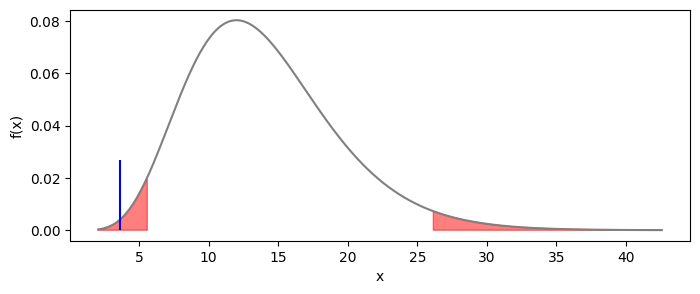

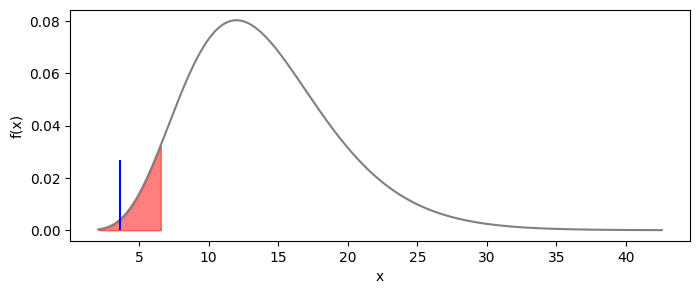

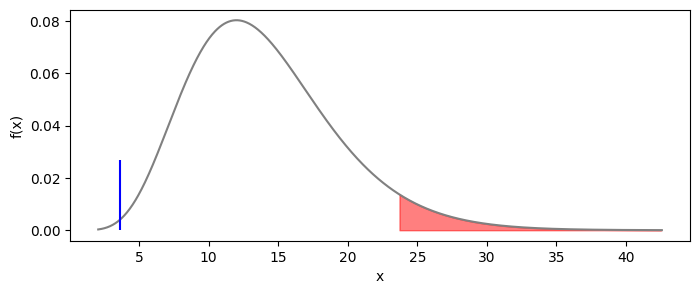

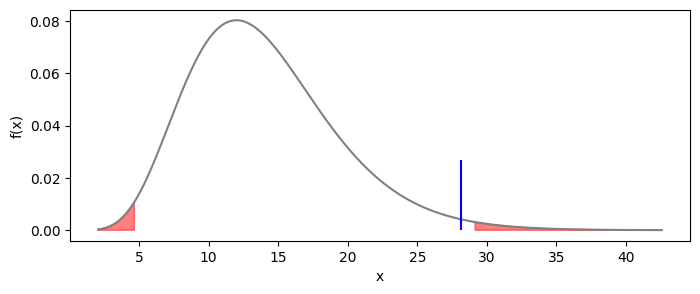

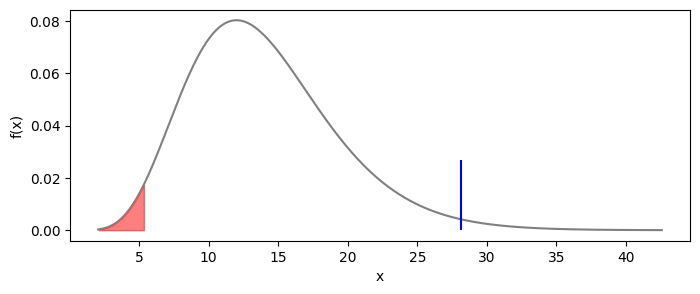

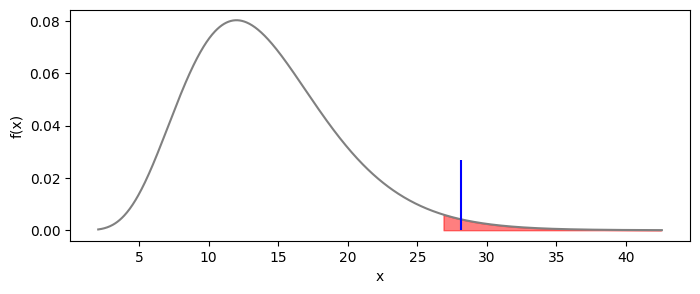

In [55]:
### Komórka testowa
results = variance_NHST(test_data_1, 0.1, "two-sided", 0.05)
assert np.all(np.isclose((results[0], results[1][0], results[1][1], results[2]), (3.657103504858619, 5.628726103039731, 26.11894804503737, 1)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.1, "less", 0.05), (3.657103504858619, 6.570631383789345, 1)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.1, "greater", 0.05), (3.657103504858619, 23.684791304840576, 0)))

results = variance_NHST(test_data_1, 0.013, "two-sided", 0.02)
assert np.all(np.isclose((results[0], results[1][0], results[1][1], results[2]), (28.13156542198938, 4.660425062657768, 29.141237740672796, 0)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.013, "less", 0.02), (28.13156542198938, 5.368197419889671, 0)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.013, "greater", 0.02), (28.13156542198938, 26.872764642314312, 1)))

### Zadanie 3: Weryfikacja hipotezy o wskaźniku struktury (proporcji) [7 pkt]

Przygotuj funkcję `proportion_NHST()`, która będzie weryfikować hipotezę o wartości wskaźnika struktury (proporcji) i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w dołączonym do notatnika zestawie wzorów, w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

In [ ]:
def proportion_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "X" wynikami próby losowej (True, False).
    H0: float
        Wartość wskaźnika struktury przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość wskaźnika struktury jest różna od wartości przyjętej w H0,
        - less: wartość wskaźnika struktury jest mniejsza od wartości przyjętej w H0,
        - greater: wartość wskaźnika struktury jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    u: float
        Wyliczona na podstawie próby losowej wartość statystyki u.
    u_alpha: float
        Wartość statystyki u_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
### Komórka testowa
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "two-sided", 0.1), (-1.3856406460551018, 1.6448536269514722, 0)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "less", 0.1), (-1.3856406460551018, -1.2815515655446004, 1)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "greater", 0.1), (-1.3856406460551018, 1.2815515655446004, 0)))

assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "two-sided", 0.01), (2.9999999999999996, 2.5758293035489004, 1)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "less", 0.01), (2.9999999999999996, -2.3263478740408408, 0)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "greater", 0.01), (2.9999999999999996, 2.3263478740408408, 1)))

### Zadanie 4: Jednoczynnikowa analiza wariancji [9 pkt]

Przygotuj funkcję `one_way_anova()`, która będzie weryfikować hipotezę o równości wartości przeciętnych i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

Uwaga! Celem zadanie jest zapoznanie się ze schematem metody i samodzielne napisanie funkcji od podstaw. W związku z tym podczas rozwiązywania zadania nie należy korzystać z gotowych funkcji przeprowadzających analizę wariancji.

In [ ]:
def one_way_anova(data, alpha):
    """
    data: DataFrame
        Tablica zawierająca domyślny indeks i dowolnie nazwane kolumny (nazwy prób losowych) z wynikami prób losowych. Znajdujące się w tablicy wartości NaN nie są wynikami wchodzącymi w skład prób losowych,
        a jedynie uzupełniają puste miejsca w tablicy powstałe na skutek różnej liczebności poszczególnych prób.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    F: float
        Wyliczona na podstawie próby losowej wartość statystyki F.
    F_alpha: float
        Wartość statystyki F_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
### Komórka testowa
assert np.all(np.isclose(one_way_anova(test_data_3, 0.05), (1.127072228543553, 3.8852938346523946, 0)))
assert np.all(np.isclose(one_way_anova(test_data_4, 0.05), (11.25773195876289, 4.256494729093748, 1)))
assert np.all(np.isclose(one_way_anova(test_data_5, 0.02), (4.79388401864753, 2.7336800410268243, 1)))

### Zadanie 5: Weryfikacja hipotez z wykorzystaniem dedykowanych funkcji [8 pkt]

#### a) Rzut monetą
Zmienna `coin_toss_sample` zawiera wyniki 50 rzutów monetą. Korzystając z funkcji `scipy.stats.binomtest()` zweryfikuj hipotezę, że moneta jest uczciwa (prawdopodobieństwo wyrzucenia orła i reszki jest równe). W obliczeniach przyjmij poziom istotności 1 - alpha = 0.95.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_1`, oraz przygotuj zmienną `H_1` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

In [ ]:
coin_toss_sample = ['O', 'R', 'O', 'O', 'R', 'R', 'O', 'R', 'O', 'O',
                    'O', 'O', 'O', 'R', 'O', 'R', 'O', 'O', 'O', 'R',
                    'R', 'R', 'O', 'O', 'R', 'O', 'R', 'O', 'O', 'O',
                    'R', 'O', 'R', 'O', 'R', 'O', 'O', 'O', 'R', 'O',
                    'O', 'O', 'O', 'O', 'R', 'O', 'R', 'O', 'O', 'O']

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
### Komórka testowa
assert np.isclose(pvalue_1, 0.032839137564268484)
assert H_1 == 1

#### b) Średnia waga elementów schodzących z linii produkcyjnych

Zmienne `weights_1` oraz `weights_2` zawierają wagi elementów (podane w gramach) losowo zdjętych z dwóch linii produkcyjnych.

In [ ]:
weights_1 = [525, 485, 515, 510, 496, 512, 521, 524, 501, 517, 498, 503, 499, 477, 493, 487, 512, 505, 483, 507] 
weights_2 = [523, 515, 519, 524, 498, 508, 502, 509, 513, 521, 516, 519, 497, 521, 498, 518, 526, 497, 494, 506]

Korzystając z funkcji `scipy.stats.ttest_1samp()` zweryfikuj hipotezę, że średnia waga elementów schodzących z pierwszej linii produkcyjnej jest równa 0.5kg względem hipotezy alternatywnej, że średnia waga elementów schodzących z pierwszej linii produkcyjnej jest wyższa od 0.5kg. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.9.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_2`, oraz przygotuj zmienną `H_2` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
### Komórka testowa
assert np.isclose(pvalue_2, 0.13688813254569193)
assert H_2 == 0

Korzystając z funkcji `scipy.stats.ttest_rel()` zweryfikuj hipotezę, że średnie wagi elementów schodzących z obu linii produkcyjnych są identyczne, względem hipotezy alternatywnej, że średnia waga elementów schodzących z drugiej linii produkcyjnej jest wyższa niż z pierwszej linii. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.98.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_3`, oraz przygotuj zmienną `H_3` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
### Komórka testowa
assert np.isclose(pvalue_3, 0.019512297706307014)
assert H_3 == 1

#### c)
Korzystając z funkcji `sp.stats.f_oneway()` zweryfikuj hipotezę o równości wartości średnich zmiennych zawartych w zmiennej `test_data_4`. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.95.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_4`, oraz przygotuj zmienną `H_4` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Uwagi do wykonania zadania:
 - ustaw następującą wartość argumentu funkcji wykonującej test statystyczny odpowiedzialnego za radzenie sobie z wartościami nan: `nan_policy="omit"`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Komórka testowa
assert np.isclose(pvalue_4, 0.003554140748362928)
assert H_4 == 1